Installation de statsmodels

In [1]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


Importation des modules

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

Importation des données

In [6]:
data=pd.read_excel("/users/2024/ds2/119008303/Documents/Econom/EUROMILLION2019-2020.xlsx",index_col="obs")
data.head()

,jour_de_tirage,nombre de grilles jouées,date_de_tirage,numéro_de_tirage_dans_le_cycle,B1,B2,B3,B4,B5,E1,...,rapport_du_rang10_Euro_Millions,nombre_de_gagnant_au_rang11_Euro_Millions_en_france,nombre_de_gagnant_au_rang11_Euro_Millions_en_europe,rapport_du_rang11_Euro_Millions,nombre_de_gagnant_au_rang12_Euro_Millions_en_france,nombre_de_gagnant_au_rang12_Euro_Millions_en_europe,rapport_du_rang12_Euro_Millions,nombre_de_gagnant_au_rang13_Euro_Millions_en_france,nombre_de_gagnant_au_rang13_Euro_Millions_en_europe,rapport_du_rang13_Euro_Millions
obs,,,,,,,,,,,,,,,,,,,,,
1,VENDREDI,31265300,2019-03-01,3,9,19,26,31,6,12,...,8.6,17678,122104,13.9,87733,544016,9.3,337958,1744195,3.5
2,MARDI,20321880,2019-03-05,4,16,10,46,39,6,8,...,12.5,16214,89499,12.3,72702,374161,8.8,184446,899304,4.5
3,VENDREDI,28461860,2019-03-08,5,40,17,24,19,18,8,...,12.2,39458,192017,8.0,124822,620211,7.4,268207,1336119,4.2
4,MARDI,21943950,2019-03-12,6,5,13,7,19,31,9,...,7.6,28236,141942,8.4,123337,586981,6.1,258696,1226756,3.5
5,VENDREDI,30509740,2019-03-15,7,46,24,42,15,3,12,...,12.2,19391,113757,14.6,102971,552873,9.0,278659,1417294,4.3


On souhaite établir une règle de décision pour savoir s'il est préférable de choisir des numéros dont la somme est : 
- choix1 : <= a
- choix2 : entre a+1 et b
- choix3 : >= b+1

In [10]:
a = 100
b = 150

In [11]:
somme = data["B1"]+data["B2"]+data["B3"]+data["B4"]+data["B5"]
somme

obs
1       91
2      117
3      118
4       75
5      130
      ... 
171    176
172    105
173     88
174    132
175     97
Length: 175, dtype: int64

In [12]:
choix = []
for s in somme:
    if s <= a:
        choix.append(1)
    elif s <= b:
        choix.append(2)
    else:
        choix.append(3)
print(choix)

[1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 1, 3, 2, 3, 1, 2, 2, 2, 2, 2, 3, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 1, 1, 1, 2, 1, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 2, 3, 2, 3, 2, 1, 1, 2, 3, 2, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 3, 1, 1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 3, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 1, 2, 1]


(array([ 34.,   0.,   0.,   0.,   0., 107.,   0.,   0.,   0.,  34.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

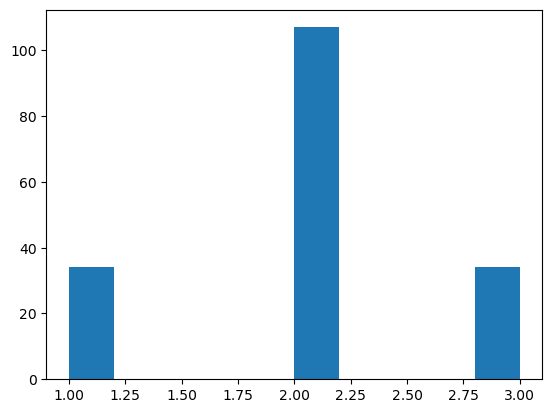

In [13]:
import matplotlib.pyplot as plt
plt.hist(choix)

On ajoute la colonne des choix au dataframe

In [17]:
datachoix=pd.concat([data,pd.DataFrame(choix, columns=["choix"])],axis=1)
datachoix.head()

,jour_de_tirage,nombre de grilles jouées,date_de_tirage,numéro_de_tirage_dans_le_cycle,B1,B2,B3,B4,B5,E1,...,nombre_de_gagnant_au_rang11_Euro_Millions_en_france,nombre_de_gagnant_au_rang11_Euro_Millions_en_europe,rapport_du_rang11_Euro_Millions,nombre_de_gagnant_au_rang12_Euro_Millions_en_france,nombre_de_gagnant_au_rang12_Euro_Millions_en_europe,rapport_du_rang12_Euro_Millions,nombre_de_gagnant_au_rang13_Euro_Millions_en_france,nombre_de_gagnant_au_rang13_Euro_Millions_en_europe,rapport_du_rang13_Euro_Millions,choix
1,VENDREDI,31265300.0,2019-03-01,3,9.0,19.0,26.0,31.0,6.0,12.0,...,17678.0,122104.0,13.9,87733.0,544016.0,9.3,337958.0,1744195.0,3.5,2.0
2,MARDI,20321880.0,2019-03-05,4,16.0,10.0,46.0,39.0,6.0,8.0,...,16214.0,89499.0,12.3,72702.0,374161.0,8.8,184446.0,899304.0,4.5,2.0
3,VENDREDI,28461860.0,2019-03-08,5,40.0,17.0,24.0,19.0,18.0,8.0,...,39458.0,192017.0,8.0,124822.0,620211.0,7.4,268207.0,1336119.0,4.2,1.0
4,MARDI,21943950.0,2019-03-12,6,5.0,13.0,7.0,19.0,31.0,9.0,...,28236.0,141942.0,8.4,123337.0,586981.0,6.1,258696.0,1226756.0,3.5,2.0
5,VENDREDI,30509740.0,2019-03-15,7,46.0,24.0,42.0,15.0,3.0,12.0,...,19391.0,113757.0,14.6,102971.0,552873.0,9.0,278659.0,1417294.0,4.3,1.0


On défini les nest (nids)

In [16]:
nests = {'inf':[1], 'milieu':[2], 'sup':[3]}

Mise en oeuvre de la méthode MNLogit avec les données quantitatives

In [28]:
type(datachoix["B1"][0])

numpy.float64

In [34]:
model = sm.MNLogit.from_formula("choix ~ B1+B2+B3+B4+B5", datachoix)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.906412
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                  choix   No. Observations:                  174
Model:                        MNLogit   Df Residuals:                      162
Method:                           MLE   Df Model:                           10
Date:                Mon, 08 Jan 2024   Pseudo R-squ.:                 0.02886
Time:                        12:22:59   Log-Likelihood:                -157.72
converged:                       True   LL-Null:                       -162.40
Covariance Type:            nonrobust   LLR p-value:                    0.4972
   choix=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2431      0.883      0.275      0.783      -1.487       1.973
B1             0.0166      0.

Interprétation des résultats:

Nous avons 5 itérations donc la méthode à convergée (nous avons bien 'converged: True')

Nous avons également :
Pseudo R-squ.:                 0.02886
Donc le modèle n'est pas bon mais cela était à prévoir

La valeur 0 est présente dans l'intervalle de confiance pour chaque variables ainsi que pour la constante donc aucun des coefficients n'est significatif, mais on va quand même interpréter les résultats
    
Le choix de référence est 1, c'est à dire '<= 100'

Pour choix2: 0.2431+0.0166*B1+...+0.0264*B5




In [35]:
effets_marginaux = results.get_margeff()
effets_marginaux.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
       MNLogit Marginal Effects      
=====================================
Dep. Variable:                  choix
Method:                          dydx
At:                           overall
==============================================================================
   choix=1      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
B1            -0.0024      0.002     -1.152      0.249      -0.007       0.002
B2             0.0002      0.002      0.086      0.931      -0.004       0.004
B3             0.0015      0.002      0.728      0.466      -0.003       0.006
B4            -0.0022      0.002     -1.103      0.270      -0.006       0.002
B5            -0.0040      0.002     -1.935      0.053      -0.008    5.08e-05
------------------------------------------------------------------------------
   choix=2      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
B1             0.0020      0.003      0.747      0.455      -0.003       0.007
B2            -0.0036      0.003     -1.398      0.162      -0.009       0.001
B3            -0.0010      0.003     -0.373      0.709      -0.006       0.004
B4             0.0007      0.003      0.288      0.773      -0.004       0.006
B5             0.0028      0.003      1.108      0.268      -0.002       0.008
------------------------------------------------------------------------------
   choix=3      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
B1             0.0005      0.002      0.222      0.825      -0.004       0.005
B2             0.0034      0.002      1.612      0.107      -0.001       0.007
B3            -0.0005      0.002     -0.251      0.802      -0.005       0.004
B4             0.0015      0.002      0.737      0.461      -0.002       0.005
B5             0.0011      0.002      0.552      0.581      -0.003       0.005
==============================================================================
"""

Interprétation: 
    
- si le résultat de la boule 1 augmente de 1, la somme des 5 boules à 0.24% de chance en moins d'être <= 100 (choix1)
- si le résultat de la boule 2 augmente de 1, la somme des 5 boules à 0.02% de chance en plus d'être <= 100 (choix1)
- si le résultat de la boule 1 augmente de 1, la somme des 5 boules à 0.2% de chance en plus d'être entre 101 et 150 (choix2)
- si le résultat de la boule 4 augmente de 1, la somme des 5 boules à 0.15% de chance en plus d'être >= 151 (choix3)

In [45]:
#Pour les mois:
datamon=[i.month_name() for i in data["date_de_tirage"]]
#datamon[0:100]

In [43]:
choixtrim = []
trim1=['January','February','March','April']
trim2=['May','June','July','August']
trim3=['September','October','November','December']
for d in datamon:
    if d in trim1:
        choixtrim.append(1)
    elif d in trim2:
        choixtrim.append(2)
    else:
        choixtrim.append(3)
print(len(choixtrim),choixtrim)

175 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [44]:
datrim=pd.concat([data,pd.DataFrame(choixtrim, columns=["choix"])],axis=1)
datrim.head()

,jour_de_tirage,nombre de grilles jouées,date_de_tirage,numéro_de_tirage_dans_le_cycle,B1,B2,B3,B4,B5,E1,...,nombre_de_gagnant_au_rang11_Euro_Millions_en_france,nombre_de_gagnant_au_rang11_Euro_Millions_en_europe,rapport_du_rang11_Euro_Millions,nombre_de_gagnant_au_rang12_Euro_Millions_en_france,nombre_de_gagnant_au_rang12_Euro_Millions_en_europe,rapport_du_rang12_Euro_Millions,nombre_de_gagnant_au_rang13_Euro_Millions_en_france,nombre_de_gagnant_au_rang13_Euro_Millions_en_europe,rapport_du_rang13_Euro_Millions,choix
1,VENDREDI,31265300.0,2019-03-01,3,9.0,19.0,26.0,31.0,6.0,12.0,...,17678.0,122104.0,13.9,87733.0,544016.0,9.3,337958.0,1744195.0,3.5,1.0
2,MARDI,20321880.0,2019-03-05,4,16.0,10.0,46.0,39.0,6.0,8.0,...,16214.0,89499.0,12.3,72702.0,374161.0,8.8,184446.0,899304.0,4.5,1.0
3,VENDREDI,28461860.0,2019-03-08,5,40.0,17.0,24.0,19.0,18.0,8.0,...,39458.0,192017.0,8.0,124822.0,620211.0,7.4,268207.0,1336119.0,4.2,1.0
4,MARDI,21943950.0,2019-03-12,6,5.0,13.0,7.0,19.0,31.0,9.0,...,28236.0,141942.0,8.4,123337.0,586981.0,6.1,258696.0,1226756.0,3.5,1.0
5,VENDREDI,30509740.0,2019-03-15,7,46.0,24.0,42.0,15.0,3.0,12.0,...,19391.0,113757.0,14.6,102971.0,552873.0,9.0,278659.0,1417294.0,4.3,1.0


In [46]:
nestsm = {'Premier trimestre':[1], 'Second trimestre':[2], 'Troisième trimestre':[3]}

In [47]:
modelm = sm.MNLogit.from_formula("choix ~ B1+B2+B3+B4+B5", datrim)
resultsm = modelm.fit()
print(resultsm.summary())

Optimization terminated successfully.
         Current function value: 1.043842
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                  choix   No. Observations:                  174
Model:                        MNLogit   Df Residuals:                      162
Method:                           MLE   Df Model:                           10
Date:                Mon, 08 Jan 2024   Pseudo R-squ.:                 0.04069
Time:                        13:30:25   Log-Likelihood:                -181.63
converged:                       True   LL-Null:                       -189.33
Covariance Type:            nonrobust   LLR p-value:                    0.1179
   choix=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2863      0.809      0.354      0.723      -1.300       1.872
B1            -0.0037      0.

In [48]:
effets_marginauxm = resultsm.get_margeff()
effets_marginauxm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
       MNLogit Marginal Effects      
=====================================
Dep. Variable:                  choix
Method:                          dydx
At:                           overall
==============================================================================
   choix=1      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
B1             0.0003      0.002      0.117      0.907      -0.004       0.005
B2             0.0002      0.002      0.070      0.944      -0.004       0.005
B3            -0.0082      0.002     -3.643      0.000      -0.013      -0.004
B4             0.0019      0.002      0.848      0.396      -0.002       0.006
B5             0.0019      0.002      0.803      0.422      -0.003       0.007
------------------------------------------------------------------------------
   choix=2      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
B1            -0.0011      0.003     -0.408      0.683      -0.006       0.004
B2            -0.0026      0.003     -1.033      0.302      -0.008       0.002
B3             0.0030      0.003      1.141      0.254      -0.002       0.008
B4            -0.0025      0.002     -0.994      0.320      -0.007       0.002
B5            -0.0013      0.003     -0.507      0.612      -0.006       0.004
------------------------------------------------------------------------------
   choix=3      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
B1             0.0008      0.002      0.326      0.744      -0.004       0.006
B2             0.0025      0.002      1.036      0.300      -0.002       0.007
B3             0.0053      0.002      2.208      0.027       0.001       0.010
B4             0.0006      0.002      0.248      0.804      -0.004       0.005
B5            -0.0006      0.002     -0.247      0.805      -0.005       0.004
==============================================================================
"""

Interprétation: 
    
- si le résultat de la boule 1 augmente de 1, les 5 boules ont 0.03% de chance en plus d'être tirées au premier trimestre (choix1)
- si le résultat de la boule 2 augmente de 1, les 5 boules ont 0.02% de chance en plus d'être tirées au premier trimestre (choix1)
- si le résultat de la boule 1 augmente de 1, les 5 boules ont 0.11% de chance en moins d'être tirées au second trimestre (choix2)
- si le résultat de la boule 4 augmente de 1, les 5 boules ont 0.06% de chance en plus d'être tirées au troisième trimestre (choix3)